In [132]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from IPython.display import Image, display

# Practice 2

In [133]:
df0 = pd.read_csv('EDA_A_data.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18428 entries, 0 to 18427
Data columns (total 46 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   dim_is_requested                                    18428 non-null  bool   
 1   ds_night                                            18428 non-null  object 
 2   ds                                                  18428 non-null  object 
 3   id_listing_anon                                     18428 non-null  object 
 4   id_user_anon                                        18428 non-null  object 
 5   m_effective_daily_price                             18428 non-null  float64
 6   m_pricing_cleaning_fee                              18428 non-null  float64
 7   dim_market                                          18428 non-null  object 
 8   dim_lat                                             18428 non-null  float64


In [134]:
df0.groupby('dim_market')[['ds_night', 'id_listing_anon',]].nunique()

,ds_night,id_listing_anon
dim_market,,
Los Angeles,364,1754
Paris,364,4129
San Francisco,358,737


In [135]:
# number of listings users have 
# df0['id_user_anon'].value_counts().value_counts()

In [136]:
df0['ds'] = pd.to_datetime(df0['ds'])

In [230]:
df0.columns

Index(['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 'id_user_anon',
       'm_effective_daily_price', 'm_pricing_cleaning_fee', 'dim_market',
       'dim_lat', 'dim_lng', 'dim_room_type', 'dim_person_capacity',
       'dim_is_instant_bookable', 'm_checkouts', 'm_reviews',
       'days_since_last_booking', 'cancel_policy', 'image_quality_score',
       'm_total_overall_rating', 'm_professional_pictures',
       'dim_has_wireless_internet', 'ds_night_day_of_week',
       'ds_night_day_of_year', 'ds_checkin_gap', 'ds_checkout_gap',
       'occ_occupancy_plus_minus_7_ds_night',
       'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_trailing_90_ds',
       'm_minimum_nights', 'm_maximum_nights', 'price_booked_most_recent',
       'p2_p3_click_through_score', 'p3_inquiry_score',
       'listing_m_listing_views_2_6_ds_night_decay',
       'general_market_m_unique_searchers_0_6_ds_night',
       'general_market_m_contacts_0_6_ds_night',
       'general_market_m_reservation_r

In [137]:
columns = ['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 
       'm_effective_daily_price', 'm_pricing_cleaning_fee', 'dim_market',
       'dim_room_type', 'dim_person_capacity',
       'dim_is_instant_bookable', 'm_checkouts', 'm_reviews',
       'days_since_last_booking', 'cancel_policy', 
       'm_total_overall_rating', 'dim_has_wireless_internet', 'ds_night_day_of_week',
       'kdt_score',
#        'image_quality_score', 'm_professional_pictures',
#        'ds_checkin_gap', 'ds_checkout_gap',
#        'occ_occupancy_plus_minus_7_ds_night',
#        'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_trailing_90_ds',
#        'm_minimum_nights', 'm_maximum_nights', 'price_booked_most_recent',
#        'general_market_m_unique_searchers_0_6_ds_night',
#        'general_market_m_contacts_0_6_ds_night',
#        'general_market_m_reservation_requests_0_6_ds_night',
#        'general_market_m_is_booked_0_6_ds_night',
#        'r_kdt_listing_views_0_6_avg_n100', 'r_kdt_n_active_n100',
#        'r_kdt_n_available_n100', 'r_kdt_m_effective_daily_price_n100_p50',
#        'r_kdt_m_effective_daily_price_available_n100_p50',
#        'r_kdt_m_effective_daily_price_booked_n100_p50'
       ]
columns_num = ['m_effective_daily_price', 'm_pricing_cleaning_fee', 
        'dim_person_capacity',
        'm_checkouts', 'm_reviews',
       'days_since_last_booking', 
       'm_total_overall_rating', 'kdt_score',]

columns_cat = ['dim_room_type', 'dim_is_instant_bookable', 'cancel_policy', 
        'dim_has_wireless_internet', 'ds_night_day_of_week',]

columns_other = ['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 'dim_market',]
df1 = df0[columns].copy()

In [138]:
df1.isnull().sum()

dim_is_requested                0
ds_night                        0
ds                              0
id_listing_anon                 0
m_effective_daily_price         0
m_pricing_cleaning_fee          0
dim_market                      0
dim_room_type                   0
dim_person_capacity             0
dim_is_instant_bookable         0
m_checkouts                    15
m_reviews                      15
days_since_last_booking      3735
cancel_policy                   0
m_total_overall_rating         15
dim_has_wireless_internet       0
ds_night_day_of_week            0
kdt_score                       0
dtype: int64

In [139]:
df1['days_since_last_booking'] = df1['days_since_last_booking'].fillna(9999)
df1 = df1.dropna(axis=0)

In [140]:
df1 = pd.concat((df1, pd.get_dummies(df1[columns_cat].astype('category'), drop_first=True).astype(int)), axis=1).drop(columns_cat, axis=1)
df1['dim_is_requested'] = df1['dim_is_requested'].astype(int)

In [141]:
dim_market = 'Paris'
df2 = df1[df1['dim_market'] == dim_market].reset_index(drop=True)

In [142]:
import random
ttratio = 0.8
ind_train = random.sample(df2.index.tolist(), int(ttratio * len(df2)))
data_train = df2.loc[ind_train]
data_test = df2.drop(ind_train)

In [143]:
y_train, X_train, feature_names = data_train['dim_is_requested'].values, data_train.drop(columns_other, axis=1).values, data_train.drop(columns_other, axis=1).columns
y_test, X_test, feature_names = data_test['dim_is_requested'].values, data_test.drop(columns_other, axis=1).values, data_test.drop(columns_other, axis=1).columns

In [145]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
KFold = 7
random_state = 42
cv = StratifiedKFold(KFold, shuffle=True, random_state=random_state)
classfy = RandomForestClassifier(n_estimators=100,)  # AdaBoostClassifier(n_estimators=200, random_state=random_state) 
params = {
    # 'learning_rate': (1, 0.5, 0.1,),
    'min_samples_leaf': (3, 10),
    'max_features': (5, 10),
}
clf = GridSearchCV(classfy, param_grid=params, cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': (5, 10), 'min_samples_leaf': (3, 10)})

In [146]:
est = clf.best_estimator_
print(est, clf.best_score_)
pred = est.predict_proba(X_test)[:, 1]


RandomForestClassifier(max_features=5, min_samples_leaf=3) 0.7747277890135033


In [147]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.7936633568608686

In [154]:
from torch import nn
import torch


In [174]:
y_train, X_train, feature_names = data_train['dim_is_requested'].values, data_train.drop(columns_other, axis=1).values, data_train.drop(columns_other, axis=1).columns
y_test, X_test, feature_names = data_test['dim_is_requested'].values, data_test.drop(columns_other, axis=1).values, data_test.drop(columns_other, axis=1).columns

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).unsqueeze(-1)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).unsqueeze(-1)

In [225]:
dim_in = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(dim_in, 32),
    nn.ReLU(),
    nn.Linear(32, 32, bias=True),
    nn.ReLU(),
    nn.Linear(32, 32, bias=True),
    nn.ReLU(),
    nn.Linear(32, 32, bias=True),
    nn.ReLU(),
    nn.Linear(32, 1, bias=True),
    nn.Sigmoid()
)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
def train_model(X_train, y_train, X_test, y_test):
    num_epochs = 10
    for epoch in range(num_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        roc_auc = roc_auc_score(y_test, test_outputs)
    return roc_auc

kf = StratifiedKFold(5, shuffle=True)
scores = []
for train, test in kf.split(X_train, y_train):
    score = train_model(X_train[train], y_train[train], X_train[test], y_train[test])
    print(score)
    scores.append(score)
print(np.mean(scores))

0.7064564237579093
0.7097094917193951
0.7368904815471746
0.725536283122044
0.7579878615166792
0.7273161083326405


In [231]:
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    roc_auc = roc_auc_score(y_test, test_outputs)
    print(roc_auc)

0.722681660485704


# Practice 1

In [116]:
df0 = pd.read_csv('EDA_A_data.csv')

In [117]:
display(df0.groupby('dim_market')[['id_listing_anon', 'ds']].nunique())
display(df0.groupby('dim_market')['id_listing_anon'].count())

,id_listing_anon,ds
dim_market,,
Los Angeles,1754,364
Paris,4129,364
San Francisco,737,358


dim_market
Los Angeles       5282
Paris            11346
San Francisco     1800
Name: id_listing_anon, dtype: int64

In [118]:
df0['ds'] = pd.to_datetime(df0['ds'])
df0 = df0.drop_duplicates()

In [119]:
df0 = df0[~df0.m_checkouts.isnull()]
df0.days_since_last_booking = df0.days_since_last_booking.fillna(df0.days_since_last_booking.max())
df0 = df0[df0['m_effective_daily_price'] > 0]

In [120]:
columns = ['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 
       'm_effective_daily_price', 'm_pricing_cleaning_fee', 'dim_market',
       'dim_room_type', 'dim_person_capacity',
       'dim_is_instant_bookable', 'm_checkouts', 'm_reviews',
       'days_since_last_booking', 'cancel_policy', 
       'm_total_overall_rating', 'dim_has_wireless_internet', 'ds_night_day_of_week',
       'kdt_score',
       ]
columns_num = ['m_effective_daily_price', 'm_pricing_cleaning_fee', 
        'dim_person_capacity',
        'm_checkouts', 'm_reviews',
       'days_since_last_booking', 
       'm_total_overall_rating', 'kdt_score',]

columns_cat = ['dim_room_type', 'dim_is_instant_bookable', 'cancel_policy', 
        'dim_has_wireless_internet', 'ds_night_day_of_week',]

columns_other = ['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 'dim_market',]
df1 = df0[columns].copy()

In [121]:
df1[columns_num].describe()

,m_effective_daily_price,m_pricing_cleaning_fee,dim_person_capacity,m_checkouts,m_reviews,days_since_last_booking,m_total_overall_rating,kdt_score
count,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000
mean,148.842695,37.997965,3.263624,18.636892,11.055909,261.810215,48.239935,1.068326
std,255.908808,50.327432,2.007172,33.044274,20.444450,398.957336,88.699090,0.524552
min,0.046095,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.563045,0.000000,2.000000,1.000000,0.000000,8.000000,0.000000,0.666667
50%,100.000000,25.000000,2.000000,6.000000,3.000000,36.000000,14.000000,1.037037
75%,153.786570,53.616427,4.000000,22.000000,12.000000,287.000000,54.000000,1.400000
max,10000.000000,450.000000,16.000000,431.000000,270.000000,1023.000000,1265.000000,3.000000


In [122]:
# data is skewed, okay with CART models
for i in columns_num:
    print(f'{i}: {df1[i].min()}, {(df1[i] == df1[i].min()).sum()}, {(df1[i] != df1[i].min()).sum()}')

m_effective_daily_price: 0.0460952713634, 1, 18404
m_pricing_cleaning_fee: 0.0, 6309, 12096
dim_person_capacity: 1, 1155, 17250
m_checkouts: 0.0, 4512, 13893
m_reviews: 0.0, 5586, 12819
days_since_last_booking: 0.0, 858, 17547
m_total_overall_rating: 0.0, 5640, 12765
kdt_score: 0.0, 86, 18319


In [123]:
# f, ax = plt.subplots(figsize=(10, 10))
# df0[columns_num].hist(ax=ax)
# for i in columns_num:
#     f, ax = plt.subplots(figsize=(3, 3))
#     print(i)
#     df1[i].apply(lambda x: np.log(x + 0.1)).hist(ax=ax)

In [124]:
df1['y'] = df1['dim_is_requested'].astype(int)

In [125]:
for i in columns_cat:
    df1[i] = df1[i].astype('category')
df1_dummy = pd.get_dummies(df1[columns_cat], drop_first=True)

df2 = pd.concat([df1[['y', 'dim_market']], df1[columns_num], df1_dummy], axis=1)

In [126]:
frac_train = 0.8 
data = df2[df2['dim_market'] == 'Paris'].drop('dim_market', axis=1).reset_index(drop=True)

import random
ind_train = random.sample(data.index.to_list(), (round(len(data) * 0.8)))
ind_test = list(set(data.index) - set(ind_train))
data_train = data.loc[ind_train, :]
data_test = data.loc[ind_test, :]

In [127]:
y_train = data_train['y'].values
X_train = data_train.drop('y', axis=1).values
features = data_train.drop('y', axis=1).columns

y_test = data_test['y'].values
X_test = data_test.drop('y', axis=1).values

In [128]:
model = RandomForestClassifier(random_state=42, n_estimators=200, 
#                                max_features=9, min_samples_leaf=5, min_samples_split=10
                              )
# model.fit(X_train, y_train)

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV

kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
clt = GridSearchCV(model, {'max_features': range(1, 10, 2)}, cv=kf)
clt.fit(X_train, y_train)
model = clt.best_estimator_

In [129]:
score = model.predict_proba(X_test)[:, 1]

In [130]:
roc_auc = metrics.roc_auc_score(y_test, score)
roc_auc

0.8084515094948151

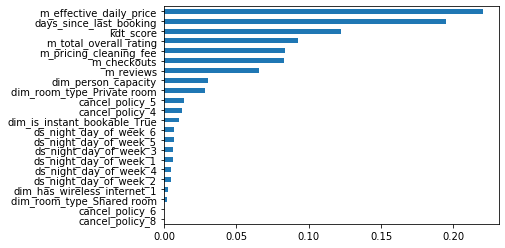

In [146]:
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values()
feature_importances.plot(kind='barh')